<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/0604_bio_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.0 MB/s eta 0:00:00


In [ ]:
import Bio
Bio.__version__

'1.81'

In [ ]:
Bio.__doc__

'Collection of modules for dealing with biological data in Python.\n\nThe Biopython Project is an international association of developers\nof freely available Python tools for computational molecular biology.\n\nhttps://biopython.org\n'

In [ ]:
#Installed path
Bio.__path__

['/usr/local/lib/python3.10/dist-packages/Bio']

In [2]:
! pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 109.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 124.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 71.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 19.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject

[FASTA 포맷]
텍스트 기반 포맷으로 염기서열 또는 단백질 서열을 나타내기위한 포맷
">" 기호로 시작되는 header와 header의 다음 줄 부터 이어지는 서열이 있음
서열 부분은 70-80개의 문자로 이루어져 있으며, Multi-FASTA(FASTA파일에 2개 이상의 header존재), 단일 FASTA가 있음


[FASTQ]
텍스트 기반 포맷으로 염기서열과 염기서열에 해당하는 퀄리티 점수를 포함한 파일 포맷
총 4줄로 구성된 하나의 Read가 있음
Read란,시퀀서가 샘플의 서열을 한번에 읽은 길이 
FASTQ파일 내부에는 수백만, 수천만개의 리드가 있음. 

첫번째 줄: "@"문자로 시작하는 header로 염기서열이 읽힌 시퀀싱에 대한 정보를 담고 있음
두번째 줄: 시퀀서가 읽음 염기서열
세번째 줄: 구분 문자로 "+"기호
네번째 줄: 시퀀서가 읽은 염기서열의 품질정보가 들어가 있음 

퀄리티 점수를 하나의 문자로 표현하기 위한 Phred quality score 체계로써, 
ASCII문자인 코딩체계에 맞추어 숫자를 알파벳으로 표현함

* 일반적으로 많이 사용하는 "일루미나 시퀀서"는 퀄리티 문자에의 ASCII값에서 -33한 점수로 표현됨
이의 Phred quality score식은 
Q = -10log10P
Q = -10(\ log_10)P

example: 101pb(base pair)

[Bed(Browser Extensible Data]
유전체를 구간별로 나누어 구간의 특징을 주석으로 표기할 수 있는 파일 형식으로 구간의 길이를 나타내는 데 효과적
각 항목들은 탭으로 나뉜 텍스트 파일

- 파일형식
필수 3개(chrom, chromStart, chromEnd)의 열이 있고 추가적으로 9개 열까지 들어갈 수 있다

 -- chrom 염색체 (ex.chr5)

 -- chromStart 구간이 시작되는 지점. 시작점 0 (ex. 55220083)

 -- chromEnd 구간이 끝나는 지점(ex.55220357)


[BED 파일]

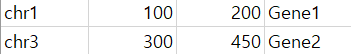

BED파일에서  세 번째 열인 chromEnd에서 두번째 열인 chromStart를 빼면 된다. 

Gene1구간은 200-100으로 100bp(base pair)

Gen2구간은 450-300으로 150bp로 총 구간은 250bp이다. 

## lifelog data

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from functools import reduce

from tqdm import tqdm
from datetime import datetime as dt

import os
import warnings

warnings.filterwarnings(action='ignore')

In [94]:
plt.rc('font', family='NanumGothic') # For Windows
#plt.rc('font', family='NanumGothic') # For Linux
plt.rc('font', family='AppleGothic') # For Mac
plt.rcParams['axes.unicode_minus'] = False

In [96]:
import matplotlib
matplotlib.matplotlib_fname()

'/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc'

In [4]:
! unzip -qq "data.zip"

#환자 정보 정리

In [73]:
info =pd.read_csv("patient_info_ANSI.csv",encoding='CP949')
#body =pd.read_csv("wearable_body_ANSI.csv")
info.head()

,ID,구분,파일명,환자번호,성별,생년월일,혈액형,혈액형RH,신장,체중
0,NNN-0001,일반인,1,0,M,1977.12.8,O,+,181.3,79.9
1,NNN-0002,일반인,2,1,M,1978.11.19,A,+,175.9,75.4
2,NNN-0003,일반인,3,2,M,1978.1.9,B,+,161.4,75.5
3,NNN-0004,일반인,4,3,F,1979.11.10,A,+,159.8,56.2
4,NNN-0005,일반인,5,4,M,1986.5.28,O,+,174.1,82.2


In [56]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1000 non-null   object 
 1   구분      1000 non-null   object 
 2   파일명     1000 non-null   int64  
 3   환자번호    1000 non-null   int64  
 4   성별      1000 non-null   object 
 5   생년월일    1000 non-null   object 
 6   혈액형     1000 non-null   object 
 7   혈액형RH   1000 non-null   object 
 8   신장      1000 non-null   float64
 9   체중      1000 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [74]:
nnn_info = info[info["ID"].str.contains('NNN')]
#nnn_info.head()
#nnn_info.info()
nnn_info = nnn_info.iloc[:, :10]

In [53]:
nnn_info = nnn_info.iloc[:, :10]
nnn_info.head()

,ID,구분,파일명,환자번호,성별,생년월일,혈액형,혈액형RH,신장
0,NNN-0001,일반인,1,0,M,1977.12.8,O,+,181.3
1,NNN-0002,일반인,2,1,M,1978.11.19,A,+,175.9
2,NNN-0003,일반인,3,2,M,1978.1.9,B,+,161.4
3,NNN-0004,일반인,4,3,F,1979.11.10,A,+,159.8
4,NNN-0005,일반인,5,4,M,1986.5.28,O,+,174.1


In [72]:
nnn_info.head()

,Unnamed: 0,ID,구분,파일명,환자번호,성별,생년월일,혈액형,혈액형RH,신장,체중
0,0,NNN-0001,일반인,1,0,M,1977.12.8,O,+,181.3,79.9
1,1,NNN-0002,일반인,2,1,M,1978.11.19,A,+,175.9,75.4
2,2,NNN-0003,일반인,3,2,M,1978.1.9,B,+,161.4,75.5
3,3,NNN-0004,일반인,4,3,F,1979.11.10,A,+,159.8,56.2
4,4,NNN-0005,일반인,5,4,M,1986.5.28,O,+,174.1,82.2


In [75]:
#colab contents 경로에 저장
#! pwd
nnn_info.to_csv('NNN_info.csv',index=False)

In [76]:
ccc_info =pd.read_csv("CCC_info.csv", encoding='CP949')
nnn_info =pd.read_csv("NNN_info.csv")

In [77]:
nnn_info.head()

,ID,구분,파일명,환자번호,성별,생년월일,혈액형,혈액형RH,신장,체중
0,NNN-0001,일반인,1,0,M,1977.12.8,O,+,181.3,79.9
1,NNN-0002,일반인,2,1,M,1978.11.19,A,+,175.9,75.4
2,NNN-0003,일반인,3,2,M,1978.1.9,B,+,161.4,75.5
3,NNN-0004,일반인,4,3,F,1979.11.10,A,+,159.8,56.2
4,NNN-0005,일반인,5,4,M,1986.5.28,O,+,174.1,82.2


In [9]:
ccc_info.head()

,,구분,파일명,환자번호,성별,생년월일,혈액형,혈액형RH,신장,체중
0,CCC-0001,만성질환자,201,200,M,1970.12.24,B,+,171.5,68.9
1,CCC-0002,만성질환자,202,201,M,1972.11.6,O,+,176.0,76.5
2,CCC-0003,만성질환자,203,202,F,1978.7.21,O,+,165.6,58.8
3,CCC-0004,만성질환자,204,203,F,1980.9.22,A,+,164.7,54.8
4,CCC-0005,만성질환자,205,204,M,1970.9.12,B,+,175.0,78.2


In [10]:
nnn_info.head()

,ID,구분,파일명,환자번호,성별,생년월일,혈액형,혈액형RH,신장,체중
0,CCC-0001,만성질환자,201,200,M,1970.12.24,B,+,171.5,68.9
1,CCC-0002,만성질환자,202,201,M,1972.11.6,O,+,176.0,76.5
2,CCC-0003,만성질환자,203,202,F,1978.7.21,O,+,165.6,58.8
3,CCC-0004,만성질환자,204,203,F,1980.9.22,A,+,164.7,54.8
4,CCC-0005,만성질환자,205,204,M,1970.9.12,B,+,175.0,78.2


In [78]:
# 나이계산

#from datetime import datetime as dt
nnn_info['생년월일'] = pd.to_datetime(nnn_info['생년월일'], format='%Y-%m-%d %H:%M:%S', errors='raise')
ccc_info['생년월일'] = pd.to_datetime(nnn_info['생년월일'], format='%Y-%m-%d %H:%M:%S', errors='raise')


In [79]:
#today = dt.now()
nnn_info['출생년도'] = nnn_info['생년월일'].dt.year
ccc_info['출생년도'] = nnn_info['생년월일'].dt.year
nnn_info.head()

,ID,구분,파일명,환자번호,성별,생년월일,혈액형,혈액형RH,신장,체중,출생년도
0,NNN-0001,일반인,1,0,M,1977-12-08,O,+,181.3,79.9,1977
1,NNN-0002,일반인,2,1,M,1978-11-19,A,+,175.9,75.4,1978
2,NNN-0003,일반인,3,2,M,1978-01-09,B,+,161.4,75.5,1978
3,NNN-0004,일반인,4,3,F,1979-11-10,A,+,159.8,56.2,1979
4,NNN-0005,일반인,5,4,M,1986-05-28,O,+,174.1,82.2,1986


In [80]:
#나이별 연관도분석을 위한 나이 계산 

ccc_info['나이'] = 2023 - ccc_info['출생년도']
ccc_info.head()
nnn_info['나이'] = 2023 - nnn_info['출생년도']
nnn_info.head()

#만나이로 바꾸기 

,ID,구분,파일명,환자번호,성별,생년월일,혈액형,혈액형RH,신장,체중,출생년도,나이
0,NNN-0001,일반인,1,0,M,1977-12-08,O,+,181.3,79.9,1977,46
1,NNN-0002,일반인,2,1,M,1978-11-19,A,+,175.9,75.4,1978,45
2,NNN-0003,일반인,3,2,M,1978-01-09,B,+,161.4,75.5,1978,45
3,NNN-0004,일반인,4,3,F,1979-11-10,A,+,159.8,56.2,1979,44
4,NNN-0005,일반인,5,4,M,1986-05-28,O,+,174.1,82.2,1986,37


In [81]:
ccc_info.head()

,,구분,파일명,환자번호,성별,생년월일,혈액형,혈액형RH,신장,체중,출생년도,나이
0,CCC-0001,만성질환자,201,200,M,1977-12-08,B,+,171.5,68.9,1977,46
1,CCC-0002,만성질환자,202,201,M,1978-11-19,O,+,176.0,76.5,1978,45
2,CCC-0003,만성질환자,203,202,F,1978-01-09,O,+,165.6,58.8,1978,45
3,CCC-0004,만성질환자,204,203,F,1979-11-10,A,+,164.7,54.8,1979,44
4,CCC-0005,만성질환자,205,204,M,1986-05-28,B,+,175.0,78.2,1986,37


# 활동량 정리

In [82]:
 body =pd.read_csv("wearable_body_ANSI.csv")
 body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61466 entries, 0 to 61465
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      61466 non-null  object 
 1   체지방율    36079 non-null  float64
 2   체중      36291 non-null  float64
 3   BMI     36262 non-null  float64
 4   측정일     61466 non-null  object 
dtypes: float64(3), object(2)
memory usage: 2.3+ MB


In [85]:
NNN_body = body[body["ID"].str.contains('NNN')]
CCC_body = body[body["ID"].str.contains('CCC')]

NNN_body.to_csv('NNN_body.csv',index=False)
CCC_body.to_csv('CCC_body.csv',index=False)


In [87]:
ccc_body =pd.read_csv("CCC_body.csv")
nnn_body =pd.read_csv("NNN_body.csv")

In [88]:
ccc_body.head()

,ID,체지방율,체중,BMI,측정일
0,CCC-0001,NaN,NaN,NaN,2021-01-12
1,CCC-0001,NaN,NaN,NaN,2021-02-10
2,CCC-0001,NaN,NaN,NaN,2021-02-18
3,CCC-0001,NaN,NaN,NaN,2021-02-23
4,CCC-0001,NaN,NaN,NaN,2021-02-27


In [89]:
nnn_body.head()

,ID,체지방율,체중,BMI,측정일
0,NNN-0001,NaN,NaN,NaN,2021-08-21
1,NNN-0001,NaN,NaN,NaN,2021-09-04
2,NNN-0001,NaN,NaN,NaN,2021-09-08
3,NNN-0001,NaN,NaN,NaN,2021-09-10
4,NNN-0001,NaN,NaN,NaN,2021-09-11


<Axes: >

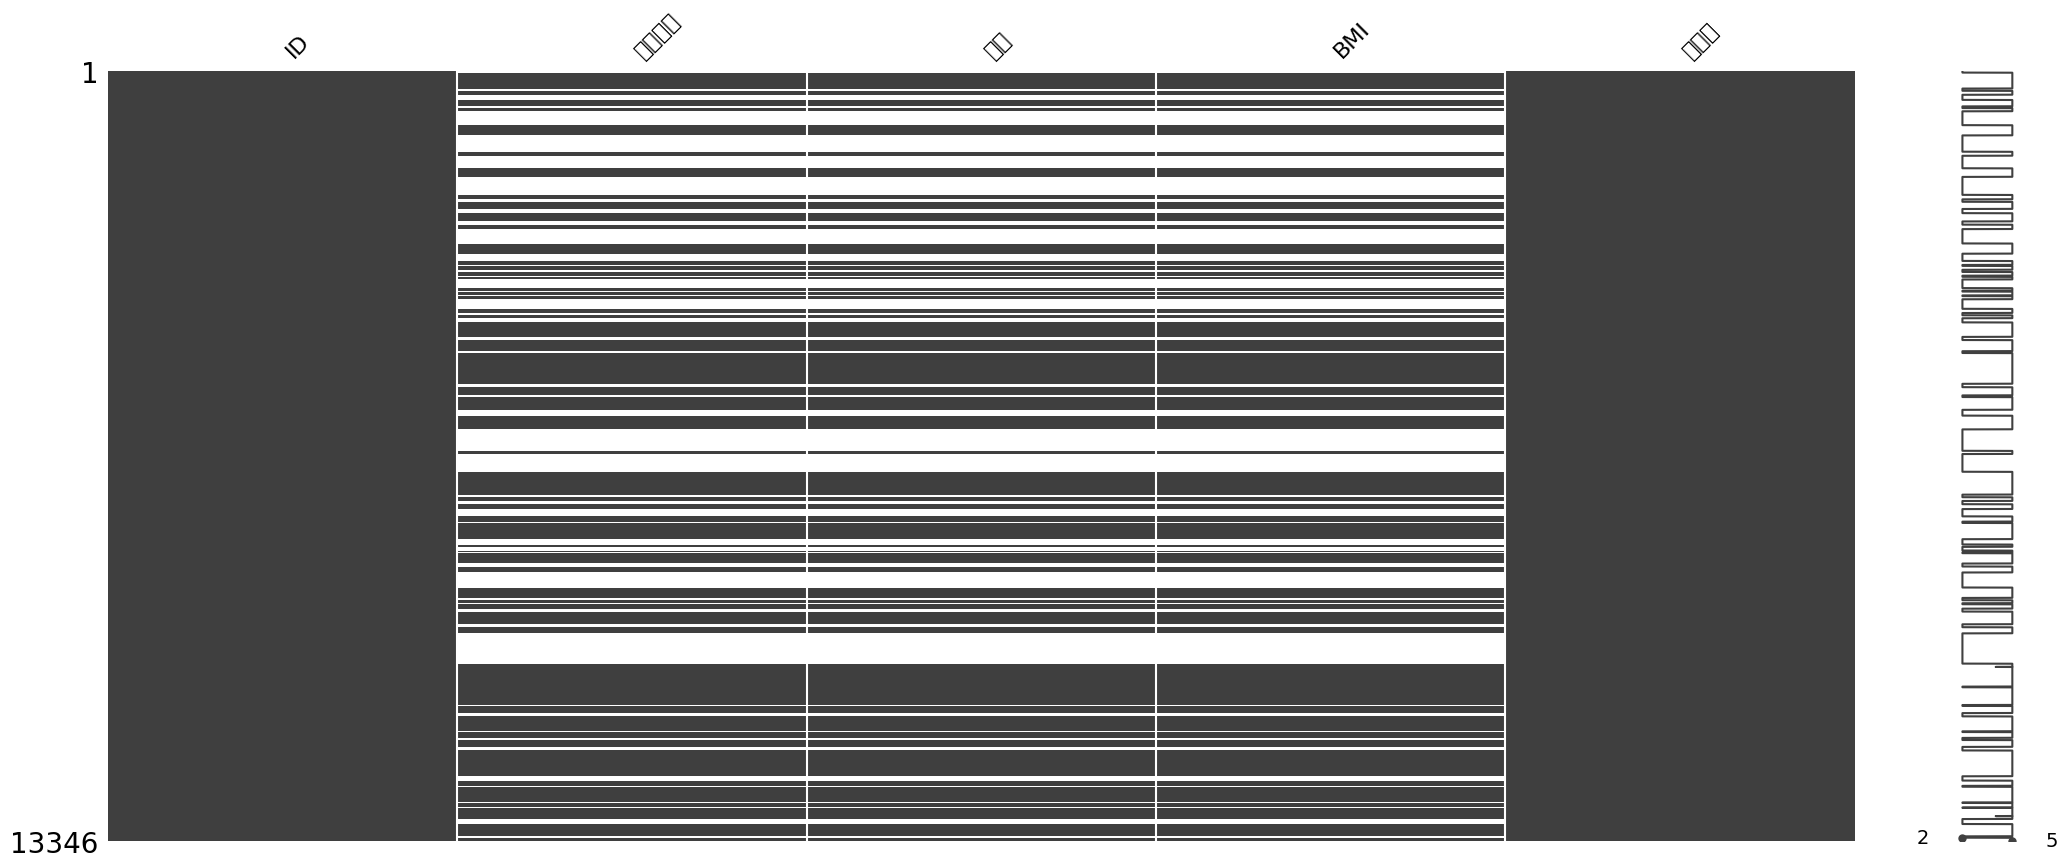

In [95]:
msno.matrix(nnn_body)

In [ ]:
nnn_body= nnn_body.dropna(how='any')
body_df.shape

In [ ]:
import zipfile

with zipfile.ZipFile("/content/temp/train.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("/content/temp/test1.zip","r") as z:
    z.extractall(".")

In [ ]:
print(len(os.listdir('/content/train')), 'training data') 
print(len(os.listdir('/content/test1')), 'test data')
os.listdir('/content/temp/')

In [ ]:
#DATA_PATH =r'C:\Users\user\Downloads\hbs-challenge-main\notebooks\data'
DATA_PATH ='C:/Users/user/Downloads/hbs-challenge-main/data'

In [ ]:
os.path.join(DATA_PATH, 'Lifelog','wearable_activity_ANSI.csv' )

'C:/Users/user/Downloads/hbs-challenge-main/data/Lifelog/wearable_activity_ANSI.csv'

In [ ]:
# lifeLog 데이터 
activity_df = pd.read_csv(os.path.join(DATA_PATH, 'Lifelog', 'wearable_activity_ANSI.csv'))
body_df = pd.read_csv(os.path.join(DATA_PATH, 'Lifelog','wearable_body_ANSI.csv'))
sleep_df = pd.read_csv(os.path.join(DATA_PATH, 'Lifelog','wearable_sleep_ANSI.csv'))

# 임상 데이터
patient_df = pd.read_csv(os.path.join(DATA_PATH, 'patient_info_ANSI.csv'), encoding='cp949')

FileNotFoundError: ignored